<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion7_g44_5sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica aplicada
sesion7 - 5 sept

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#libreria especializada
from lifelines import ExponentialFitter

In [6]:
# Datos
datos_exp = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [8]:
#Estimar un modelo de supervivencia exponencial
exp = ExponentialFitter().fit(datos_exp[' tiempo'],datos_exp[' estado'])

In [9]:
#riesgo de reacaer
exp.hazard_


,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [11]:
#probabilidad de recaer hasta los 16
exp.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [12]:
exp.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,10,10
5.0,1,1,0,0,10
8.0,1,1,0,0,9
12.0,1,1,0,0,8
16.0,1,0,1,0,7
17.0,2,1,1,0,6
19.0,1,0,1,0,4
24.0,1,1,0,0,3
30.0,1,0,1,0,2


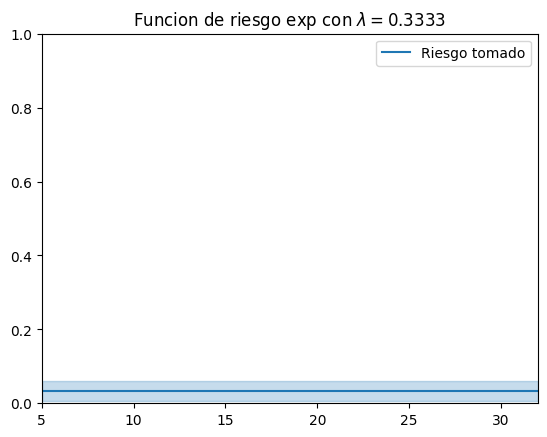

In [25]:
exp.plot_hazard(label='Riesgo tomado'); #funcion de riesgo
plt.title('Funcion de riesgo exp con $\lambda=0.3333$')
plt.xlim(5,32)
plt.ylim(0,1);

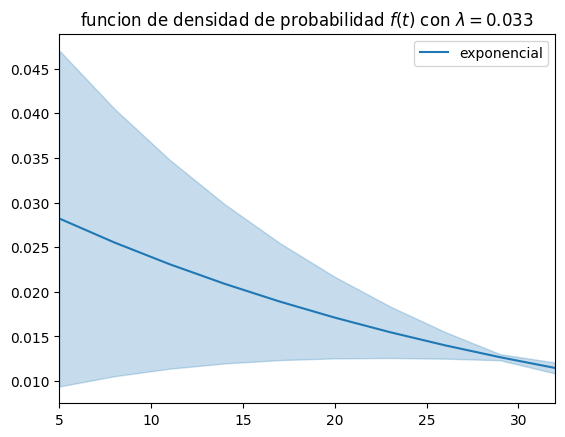

In [39]:
#f(t)
exp.plot_density(label = 'exponencial')
plt.title('funcion de densidad de probabilidad $f(t)$ con $\lambda = 0.033$')
plt.xlim(5,32);

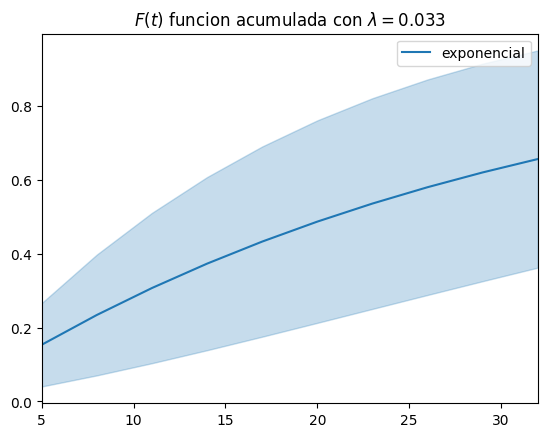

In [38]:
#acumulada
exp.plot_cumulative_density(label = 'exponencial')
plt.title('$F(t)$ funcion acumulada con $\lambda = 0.033$')
plt.xlim(5,32);

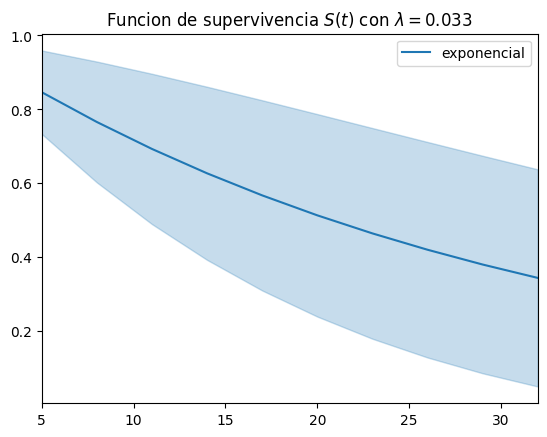

In [37]:
#S(t)
exp.plot_survival_function(label = 'exponencial')
plt.title('Funcion de supervivencia $S(t)$ con $\lambda = 0.033$')
plt.xlim(5,32);

In [47]:
from lifelines import WeibullFitter

Los datos se comportan como una funcion de densidad de probabilidad weibull

In [48]:
from lifelines.fitters import weibull_fitter


In [51]:
mweibull = WeibullFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])


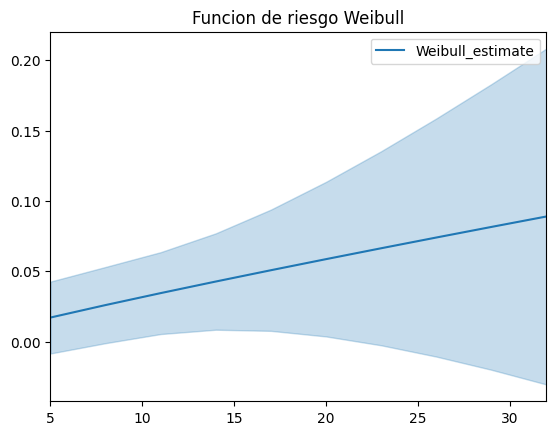

In [52]:
mweibull.plot_hazard()
plt.title('Funcion de riesgo Weibull')
plt.xlim(5,32);

In [53]:
#gamma = rho
mweibull.rho_

1.8867259500116444

In [54]:
from lifelines import LogNormalFitter

In [55]:
mlogn = LogNormalFitter().fit(datos_exp[' tiempo'],datos_exp[' estado'])

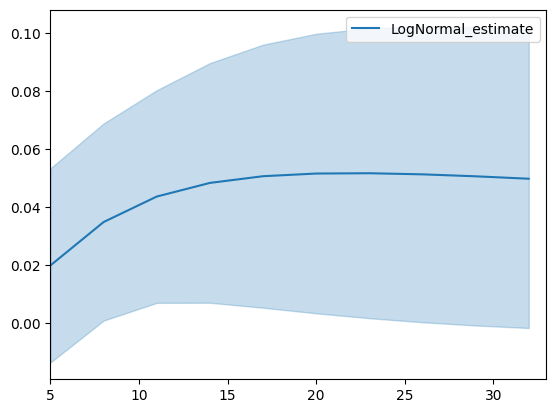

In [58]:
mlogn.plot_hazard()
plt.xlim(5,33);

In [59]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


In [68]:
#
print('Exp: ',exp.AIC_.round(2),', weibul ', mweibull.AIC_.round(2),', log-normal ', mlogn.AIC_.round(2))


Exp:  54.81 , weibul  54.16 , log-normal  54.51


El tiempo de recaida de esta enfermedad se austa mejor a un modelo Weibull, donde conforme el tiempo avanza se incrementa el riesgo de recaer